# Figures for *deep-GMF* project

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.facecolor'] = 'white'

## Data import

In [7]:
model = 'ResNet10'
dataset = 'gmf_112x112'
target = 'id'
epoch = '042'
df = pd.read_csv(f'../results/{model}_dataset-{dataset}_target-{target}_epoch-{epoch}.tsv', sep='\t')
df = df.dropna(axis=0)

Text(0.5, 0, 'Layer nr.')

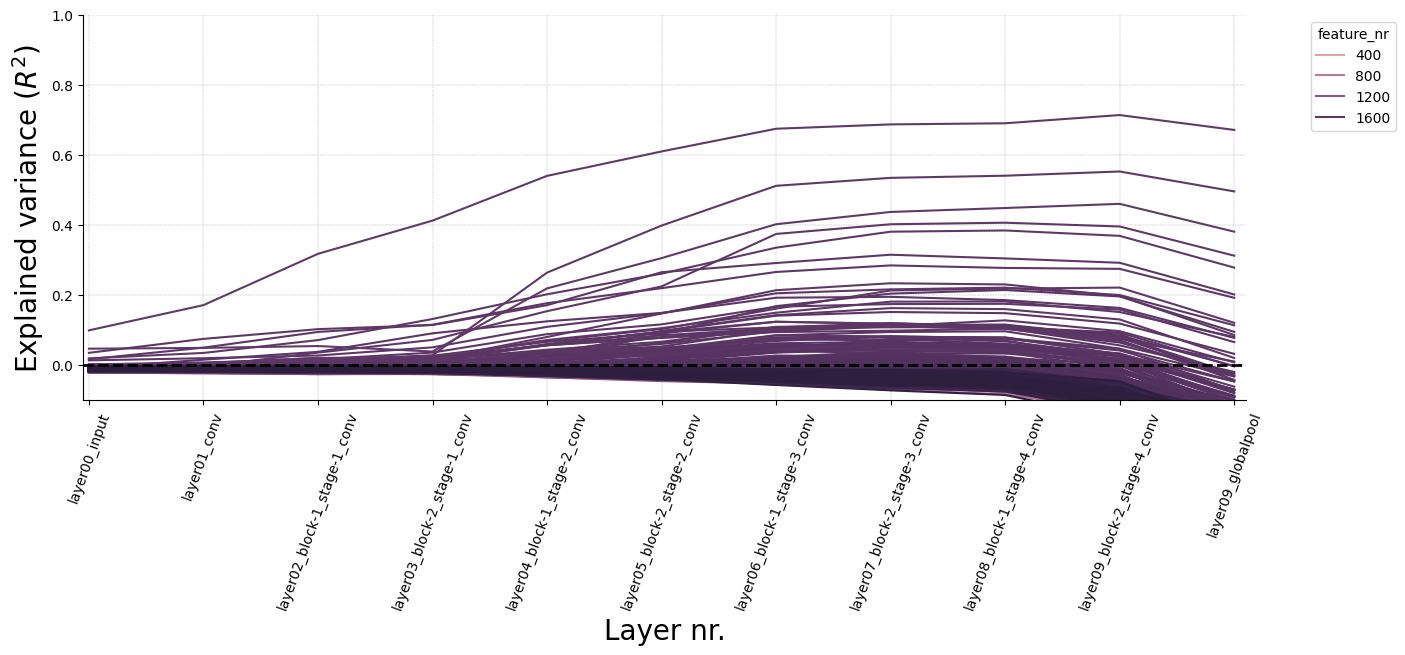

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(x='layername', y='corr', hue='feature_nr', ax=ax, data=df.query("factor == 'tex'"))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
sns.despine()

ax.grid(ls='--', lw=0.35)
ax.axhline(0, ls='--', c='k', lw=2)
ax.set_ylim(-0.1, 1)
ax.set_ylabel('Explained variance ($R^2$)', fontsize=20)
ax.set_xlim(-.05, df['op_nr'].max() + 0.1)
ax.set_xlabel('Layer nr.', fontsize=20)

Text(0.5, 0, 'Layer nr.')

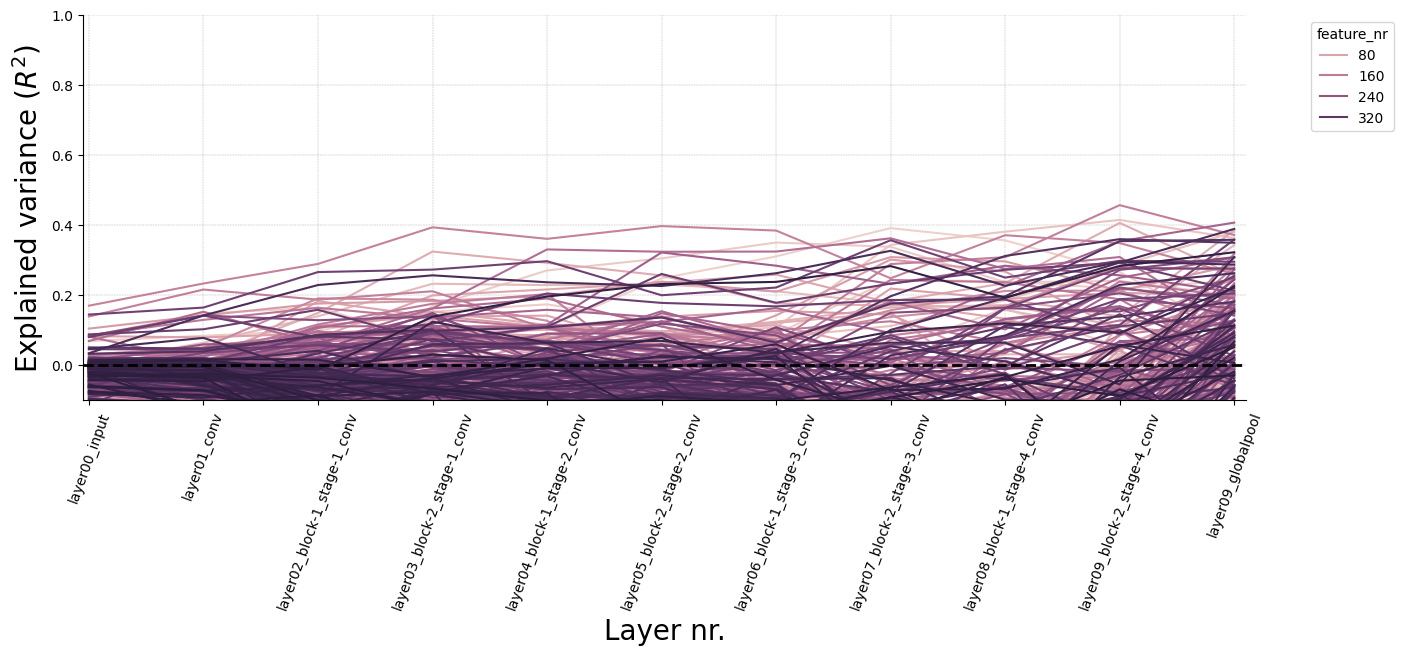

In [3]:
model = 'ResNet10'
dataset = 'gmf_112x112_binoc'
target = 'id'
epoch = '100'
df = pd.read_csv(f'../results/{model}_dataset-{dataset}_target-{target}_epoch-{epoch}.tsv', sep='\t')
df = df.dropna(axis=0)

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(x='layername', y='corr', hue='feature_nr', ax=ax, data=df.query("factor == 'shape'"))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
sns.despine()

ax.grid(ls='--', lw=0.35)
ax.axhline(0, ls='--', c='k', lw=2)
ax.set_ylim(-0.1, 1)
ax.set_ylabel('Explained variance ($R^2$)', fontsize=20)
ax.set_xlim(-.05, df['op_nr'].max() + 0.1)
ax.set_xlabel('Layer nr.', fontsize=20)

Text(0.5, 0, 'Layer nr.')

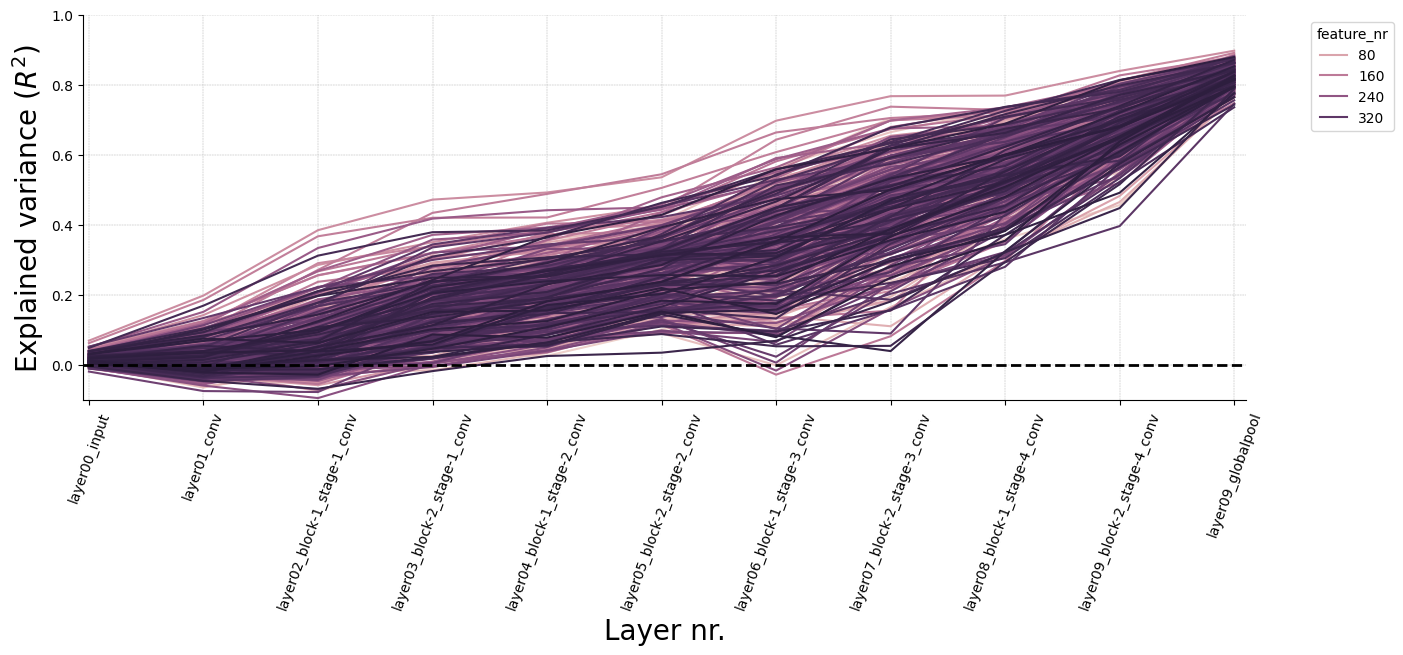

In [12]:
model = 'ResNet10'
dataset = 'gmf_112x112'
target = 'id'
epoch = '018'
df = pd.read_csv(f'../results/{model}_dataset-{dataset}_target-{target}_xepoch-{epoch}.tsv', sep='\t')
df = df.dropna(axis=0)

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(x='layername', y='corr', hue='feature_nr', ax=ax, data=df.query("factor == 'shape'"))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
sns.despine()

ax.grid(ls='--', lw=0.35)
ax.axhline(0, ls='--', c='k', lw=2)
ax.set_ylim(-0.1, 1)
ax.set_ylabel('Explained variance ($R^2$)', fontsize=20)
ax.set_xlim(-.05, df['op_nr'].max() + 0.1)
ax.set_xlabel('Layer nr.', fontsize=20)

Text(0.5, 0, 'Layer nr.')

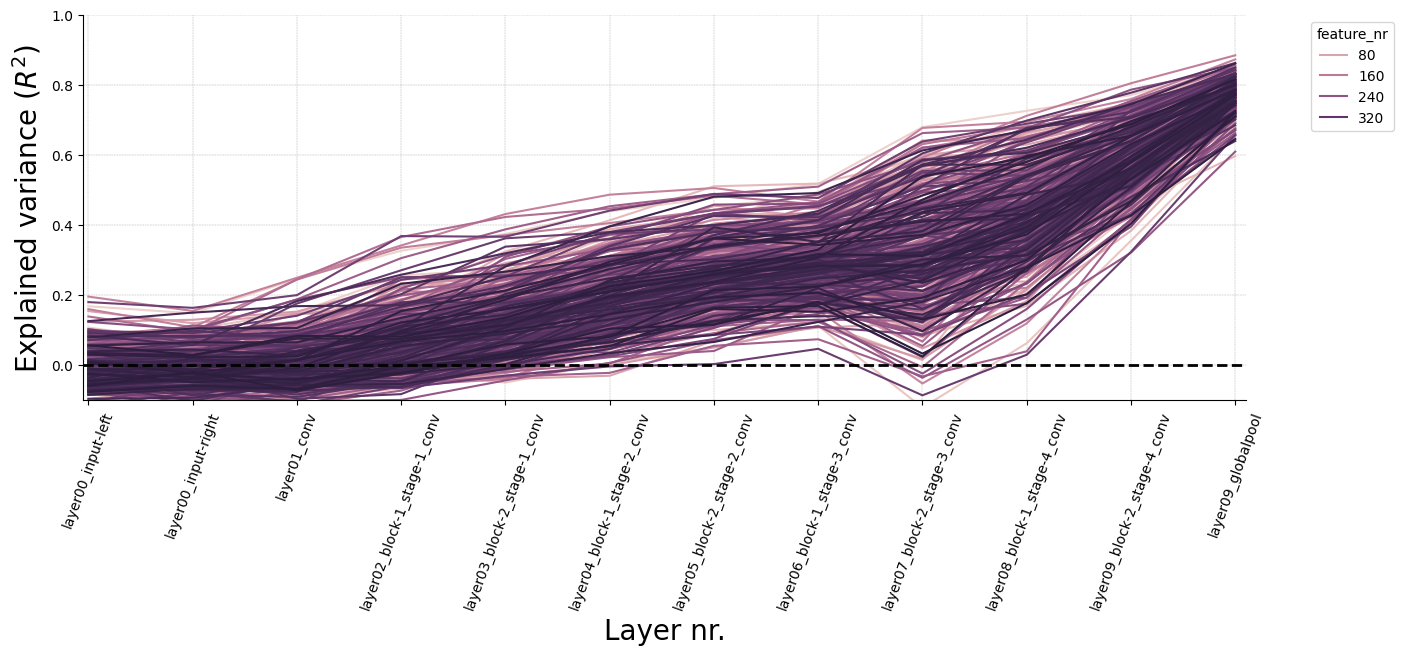

In [8]:
model = 'StereoResNet10'
dataset = 'gmf_112x112_binoc'
target = 'id'
epoch = '021'
df = pd.read_csv(f'../results/{model}_dataset-{dataset}_target-{target}_epoch-{epoch}.tsv', sep='\t')
df = df.dropna(axis=0)

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(x='layername', y='corr', hue='feature_nr', ax=ax, data=df.query("factor == 'shape'"))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
sns.despine()

ax.grid(ls='--', lw=0.35)
ax.axhline(0, ls='--', c='k', lw=2)
ax.set_ylim(-0.1, 1)
ax.set_ylabel('Explained variance ($R^2$)', fontsize=20)
ax.set_xlim(-.05, df['op_nr'].max() + 0.1)
ax.set_xlabel('Layer nr.', fontsize=20)

ValueError: AxesSubplot(0.125,0.11;0.775x0.77) has no legend attached.

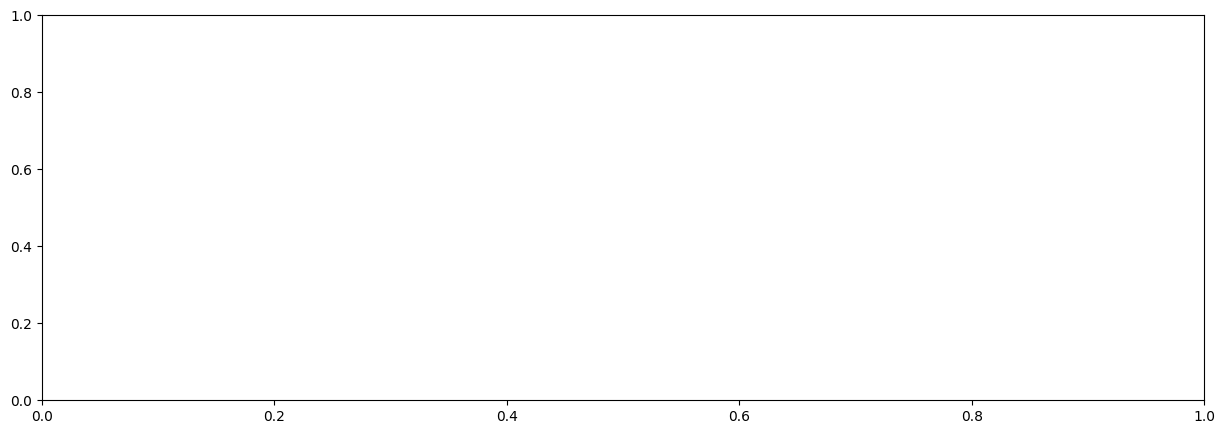

In [3]:
factors = ['gender', 'ethn', 'xr', 'yr', 'zr', 'xt', 'yt', 'zt', 'xl', 'yl']

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(x='op_nr', y='corr', hue='factor', ax=ax, data=df.query("factor in @factors"))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
sns.despine()

ax.grid(ls='--', lw=0.35)
ax.axhline(0, ls='--', c='k', zorder=-3, lw=2)
ax.set_ylim(-.5, 1)
ax.set_ylabel('Explained variance ($R^2$)', fontsize=20)
ax.set_xlim(-.05, df['op_nr'].max() + 0.1)
ax.set_xlabel('Layer nr.', fontsize=20)